In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df= pd.read_csv('Case Information_batch_3.csv')
df.head()

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C46369460,23.0,20 to 24,MALE,2022-01-07,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,...,NCR,CITY OF PARAÑAQUE,PH137604000,B. F. HOMES,PH137604007,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
1,C69025406,7.0,5 to 9,FEMALE,2022-01-06,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,...,RIZAL,ANGONO,PH045801000,SAN ISIDRO,PH045801009,RECOVERED,NO,2022-01-06,NO,"Health Status is ""Recovered"", but no Date Reco..."
2,C6572422,27.0,25 to 29,FEMALE,2022-01-06,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,...,PAMPANGA,SANTA RITA,PH035420000,SAN VICENTE,PH035420009,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
3,C16040871,17.0,15 to 19,FEMALE,2022-01-08,2022-01-09,2022-01-11,NaN,NaN,RECOVERED,...,CEBU,CEBU CITY (CAPITAL),PH072217000,PARDO (POB.),PH072217053,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
4,C66405262,41.0,40 to 44,MALE,2022-01-08,2022-01-09,2022-01-11,NaN,NaN,RECOVERED,...,NCR,CITY OF MAKATI,PH137602000,SINGKAMAS,PH137602027,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."


In [12]:
df_colm = group = pd.read_csv('Case Information_batch_3.csv', usecols = [ 'CaseCode', 'Age', 'Sex', 'ProvRes', 'CityMunRes', 'BarangayRes', 'HealthStatus' ], index_col = 'CaseCode')
df_colm.head(10)

,Age,Sex,ProvRes,CityMunRes,BarangayRes,HealthStatus
CaseCode,,,,,,
C46369460,23.0,MALE,NCR,CITY OF PARAÑAQUE,B. F. HOMES,RECOVERED
C69025406,7.0,FEMALE,RIZAL,ANGONO,SAN ISIDRO,RECOVERED
C6572422,27.0,FEMALE,PAMPANGA,SANTA RITA,SAN VICENTE,RECOVERED
C16040871,17.0,FEMALE,CEBU,CEBU CITY (CAPITAL),PARDO (POB.),RECOVERED
C66405262,41.0,MALE,NCR,CITY OF MAKATI,SINGKAMAS,RECOVERED
C43726974,31.0,FEMALE,BENGUET,BAGUIO CITY,BAKAKENG NORTH,RECOVERED
C28099663,35.0,FEMALE,CAVITE,IMUS CITY,ANABU I-A,RECOVERED
C45654738,51.0,FEMALE,CAVITE,GEN. MARIANO ALVAREZ,MARCELINO MEMIJE,RECOVERED
C52888278,54.0,FEMALE,BATAAN,ORANI,PANTALAN BAGO (POB.),MILD


In [21]:
df_data = (df_colm[df_colm['ProvRes'] == 'ILOCOS SUR'])
df_data.head()

,Age,Sex,ProvRes,CityMunRes,BarangayRes,HealthStatus
CaseCode,,,,,,
C1262675,26.0,MALE,ILOCOS SUR,CERVANTES,COMILLAS NORTH,RECOVERED
C43874335,45.0,FEMALE,ILOCOS SUR,CITY OF VIGAN (CAPITAL),BARANGAY V (POB.),RECOVERED
C40740561,37.0,FEMALE,ILOCOS SUR,CITY OF VIGAN (CAPITAL),BARANGAY V (POB.),RECOVERED
C87078322,21.0,FEMALE,ILOCOS SUR,NARVACAN,DINALAOAN,RECOVERED
C39174719,24.0,FEMALE,ILOCOS SUR,CITY OF CANDON,CALONGBUYAN,RECOVERED


In [22]:
df_data.groupby(['CaseCode'])['Age'].sum()

CaseCode
C10064264    37.0
C10069775    48.0
C10074893    32.0
C10115811    44.0
C10141048    59.0
             ... 
C99819958    31.0
C99941606    63.0
C99953086    33.0
C99961987    42.0
C9999893     34.0
Name: Age, Length: 1563, dtype: float64

In [23]:
df_data['age_bins'] = pd.cut(df_data['Age'], bins=3, labels= ('young', 'middle_age', 'old'))

<ipython-input-23-69dee24f0b67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['age_bins'] = pd.cut(df_data['Age'], bins=3, labels= ('young', 'middle_age', 'old'))


In [24]:
df_data

,Age,Sex,ProvRes,CityMunRes,BarangayRes,HealthStatus,age_bins
CaseCode,,,,,,,
C1262675,26.0,MALE,ILOCOS SUR,CERVANTES,COMILLAS NORTH,RECOVERED,young
C43874335,45.0,FEMALE,ILOCOS SUR,CITY OF VIGAN (CAPITAL),BARANGAY V (POB.),RECOVERED,middle_age
C40740561,37.0,FEMALE,ILOCOS SUR,CITY OF VIGAN (CAPITAL),BARANGAY V (POB.),RECOVERED,middle_age
C87078322,21.0,FEMALE,ILOCOS SUR,NARVACAN,DINALAOAN,RECOVERED,young
C39174719,24.0,FEMALE,ILOCOS SUR,CITY OF CANDON,CALONGBUYAN,RECOVERED,young
...,...,...,...,...,...,...,...
C58249797,27.0,FEMALE,ILOCOS SUR,SUYO,POBLACION (KIMPUSA),MILD,young
C92173719,18.0,FEMALE,ILOCOS SUR,CAOAYAN,DON LORENZO QUERUBIN (POB.),MILD,young
C9516291,26.0,FEMALE,ILOCOS SUR,MAGSINGAL,SAN BASILIO (POB.),MILD,young


In [27]:
df_data.groupby(['age_bins'])['Age'].sum()

age_bins
young         14875.0
middle_age    30702.0
old           13633.0
Name: Age, dtype: float64

In [4]:
per_sur_nonsur = (df_data["HealthStatus"].value_counts()/df_data.shape[0]*100).round(2)
per_sur_nonsur

MILD            83.30
RECOVERED       14.72
ASYMPTOMATIC     1.86
DIED             0.06
MODERATE         0.06
Name: HealthStatus, dtype: float64

In [5]:
df_new = df[(df["ProvRes"]=="ILOCOS SUR") & (df["HealthStatus"]=="MILD")]
df_new

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
53841,C98547211,34.0,30 to 34,FEMALE,NaN,NaN,2022-01-12,NaN,NaN,NaN,...,ILOCOS SUR,LIDLIDDA,PH012911000,TAY-AC,PH012911011,MILD,NO,NaN,NO,NaN
54526,C33297945,51.0,50 to 54,MALE,2022-01-12,NaN,2022-01-12,NaN,NaN,NaN,...,ILOCOS SUR,SANTO DOMINGO,PH012928000,LUSSOC,PH012928013,MILD,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank\..."
58817,C34840626,36.0,35 to 39,MALE,NaN,NaN,2022-01-13,NaN,NaN,NaN,...,ILOCOS SUR,TAGUDIN,PH012933000,FAROLA,PH012933019,MILD,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank"
74809,C48782910,53.0,50 to 54,FEMALE,2022-01-11,2022-01-12,2022-01-13,NaN,NaN,NaN,...,ILOCOS SUR,TAGUDIN,PH012933000,LAS-UD,PH012933025,MILD,NO,NaN,NO,NaN
85889,C35692324,28.0,25 to 29,FEMALE,2022-01-11,2022-01-12,2022-01-13,NaN,NaN,NaN,...,ILOCOS SUR,TAGUDIN,PH012933000,BECQUES,PH012933007,MILD,NO,NaN,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386720,C58249797,27.0,25 to 29,FEMALE,2022-01-19,2022-01-21,2022-01-22,NaN,NaN,NaN,...,ILOCOS SUR,SUYO,PH012932000,POBLACION (KIMPUSA),PH012932005,MILD,NO,2022-01-10,NO,NaN
386930,C92173719,18.0,15 to 19,FEMALE,2022-01-18,2022-01-19,2022-01-22,NaN,NaN,NaN,...,ILOCOS SUR,CAOAYAN,PH012907000,DON LORENZO QUERUBIN (POB.),PH012907017,MILD,NO,2022-01-16,NO,NaN
387036,C9516291,26.0,25 to 29,FEMALE,2022-01-18,2022-01-19,2022-01-22,NaN,NaN,NaN,...,ILOCOS SUR,MAGSINGAL,PH012912000,SAN BASILIO (POB.),PH012912032,MILD,NO,NaN,NO,NaN
387078,C11348288,54.0,50 to 54,MALE,2022-01-19,2022-01-20,2022-01-22,NaN,NaN,NaN,...,ILOCOS SUR,SINAIT,PH012930000,DADALAQUITEN NORTE,PH012930014,MILD,NO,NaN,NaN,NaN


In [6]:
df_new = df[(df["ProvRes"]=="ILOCOS SUR") & (df["HealthStatus"]=="RECOVERED")]
df_new

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
95,C1262675,26.0,25 to 29,MALE,2022-01-08,2022-01-10,2022-01-11,NaN,NaN,RECOVERED,...,ILOCOS SUR,CERVANTES,PH012908000,COMILLAS NORTH,PH012908002,RECOVERED,NO,2022-01-07,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
198,C43874335,45.0,45 to 49,FEMALE,2022-01-07,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,...,ILOCOS SUR,CITY OF VIGAN (CAPITAL),PH012934000,BARANGAY V (POB.),PH012934007,RECOVERED,NO,2022-01-06,NO,"Removal Type is ""Recovered"", but no Recovered ..."
207,C40740561,37.0,35 to 39,FEMALE,2022-01-07,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,...,ILOCOS SUR,CITY OF VIGAN (CAPITAL),PH012934000,BARANGAY V (POB.),PH012934007,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
974,C87078322,21.0,20 to 24,FEMALE,2022-01-09,2022-01-10,2022-01-11,NaN,NaN,RECOVERED,...,ILOCOS SUR,NARVACAN,PH012914000,DINALAOAN,PH012914013,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
1464,C39174719,24.0,20 to 24,FEMALE,2022-01-03,2022-01-07,2022-01-11,NaN,NaN,RECOVERED,...,ILOCOS SUR,CITY OF CANDON,PH012906000,CALONGBUYAN,PH012906017,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163424,C42268050,40.0,40 to 44,FEMALE,2022-01-10,2022-01-13,2022-01-15,NaN,NaN,RECOVERED,...,ILOCOS SUR,CITY OF VIGAN (CAPITAL),PH012934000,SAN JULIAN SUR,PH012934035,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
163830,C14307522,19.0,15 to 19,MALE,2022-01-10,2022-01-13,2022-01-15,NaN,NaN,RECOVERED,...,ILOCOS SUR,CITY OF VIGAN (CAPITAL),PH012934000,SAN JULIAN SUR,PH012934035,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
195253,C54565653,33.0,30 to 34,FEMALE,2022-01-10,2022-01-14,2022-01-16,NaN,NaN,RECOVERED,...,ILOCOS SUR,SANTA,PH012922000,MABILBILA SUR,PH012922012,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
369651,C57049311,23.0,20 to 24,MALE,2022-01-07,2022-01-07,2022-01-22,NaN,NaN,RECOVERED,...,ILOCOS SUR,CITY OF CANDON,PH012906000,SAN JOSE (POB.),PH012906038,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."


In [7]:
df_new = df[(df["ProvRes"]=="ILOCOS SUR") & (df["HealthStatus"]=="ASYMPTOMATIC")]
df_new.head(5)

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
56772,C12395569,43.0,40 to 44,FEMALE,NaN,NaN,2022-01-12,NaN,NaN,NaN,...,ILOCOS SUR,TAGUDIN,PH012933000,FAROLA,PH012933019,ASYMPTOMATIC,NO,NaN,NO,Unexpected change in Age
74827,C82623311,46.0,45 to 49,MALE,NaN,NaN,2022-01-13,NaN,NaN,NaN,...,ILOCOS SUR,TAGUDIN,PH012933000,DEL PILAR (POB.),PH012933018,ASYMPTOMATIC,NO,NaN,NaN,NaN
94390,C46983017,50.0,50 to 54,FEMALE,2022-01-11,2022-01-13,2022-01-14,NaN,NaN,NaN,...,ILOCOS SUR,SAN ESTEBAN,PH012918000,ANSAD,PH012918001,ASYMPTOMATIC,NO,2022-01-08,NO,NaN
137548,C21305758,35.0,35 to 39,MALE,2022-01-13,2022-01-13,2022-01-15,NaN,NaN,NaN,...,ILOCOS SUR,SAN VICENTE,PH012921000,BAYUBAY SUR,PH012921003,ASYMPTOMATIC,NO,NaN,NaN,NaN
157113,C19814106,46.0,45 to 49,FEMALE,2022-01-11,2022-01-14,2022-01-15,NaN,NaN,NaN,...,ILOCOS SUR,SAN VICENTE,PH012921000,POBLACION,PH012921005,ASYMPTOMATIC,NO,2022-01-08,NO,Age or Birthdate is Invalid


In [8]:
df_new = df[(df["ProvRes"]=="ILOCOS SUR") & (df["HealthStatus"]=="DIED")]
df_new.head(5)

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
20655,C59524446,84.0,80+,MALE,2022-01-07,2022-01-10,2022-01-11,2022-01-07,NaN,DIED,...,ILOCOS SUR,TAGUDIN,PH012933000,DARDARAT,PH012933017,DIED,NO,2022-01-05,NaN,NaN


In [9]:
df_new = df[(df["ProvRes"]=="ILOCOS SUR") & (df["HealthStatus"]=="MODERATE")]
df_new.head(5)

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
343697,C5619514,39.0,35 to 39,MALE,2022-01-19,2022-01-20,2022-01-21,NaN,NaN,NaN,...,ILOCOS SUR,TAGUDIN,PH012933000,DEL PILAR (POB.),PH012933018,MODERATE,NO,NaN,NaN,NaN


In [10]:
per_sur_nonsur = (df_data["CityMunRes"].value_counts()/df_data.shape[0]*100).round(2)
per_sur_nonsur

CITY OF VIGAN (CAPITAL)            21.69
BANTAY                              8.25
CABUGAO                             7.93
SINAIT                              6.78
NARVACAN                            6.40
CAOAYAN                             5.31
CITY OF CANDON                      4.41
TAGUDIN                             3.65
SANTA MARIA                         3.52
SAN VICENTE                         3.45
SANTA                               2.94
SANTA CATALINA                      2.82
SANTA CRUZ                          2.56
SANTIAGO                            2.56
SAN ESTEBAN                         2.11
SAN JUAN (LAPOG)                    2.05
SANTO DOMINGO                       1.98
SAN ILDEFONSO                       1.60
MAGSINGAL                           1.60
SALCEDO (BAUGEN)                    1.47
NAGBUKEL                            1.09
SANTA LUCIA                         1.02
CERVANTES                           0.90
SUYO                                0.83
GALIMUYOD       

<AxesSubplot:>

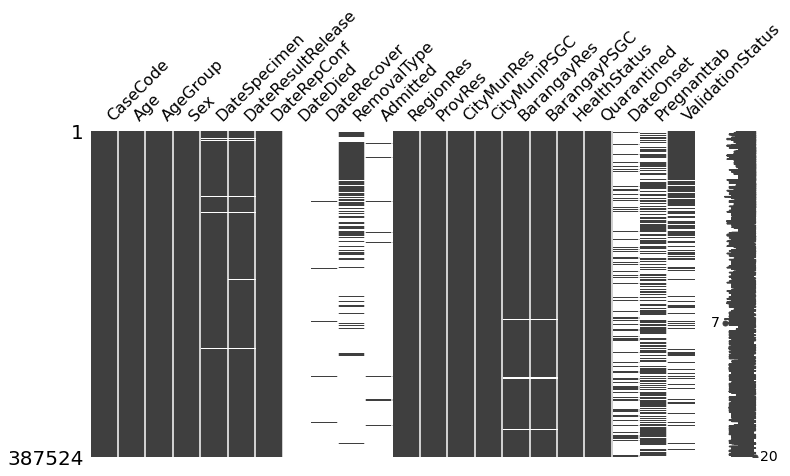

In [11]:
import missingno as msno 
# Visualize missing values as a matrix 
msno.matrix(df,figsize=(12,6))

In [12]:
# get column names
column_names = df.columns

# for each attributes (columns), print value counts
for column_name in  column_names:
    print(df[column_name].value_counts())

C287845      8
C463790      5
C246822      4
C57319323    4
C407509      3
            ..
C49961832    1
C21924354    1
C3574924     1
C14226051    1
C77787290    1
Name: CaseCode, Length: 387018, dtype: int64
26.0     14579
25.0     14257
28.0     13994
24.0     13960
27.0     13901
         ...  
104.0        4
103.0        3
105.0        2
106.0        2
107.0        2
Name: Age, Length: 108, dtype: int64
25 to 29    70595
30 to 34    59807
20 to 24    43693
35 to 39    43657
40 to 44    35152
45 to 49    26413
50 to 54    21686
55 to 59    16960
60 to 64    12312
15 to 19    10912
0 to 4       8899
65 to 69     8092
10 to 14     7604
5 to 9       7489
70 to 74     5733
80+          4842
75 to 79     3514
Name: AgeGroup, dtype: int64
FEMALE    207793
MALE      179731
Name: Sex, dtype: int64
2022-01-10    41732
2022-01-11    38037
2022-01-12    36605
2022-01-13    34029
2022-01-14    33695
              ...  
2021-05-28        1
2021-11-01        1
2021-05-07        1
2021-11-16     

In [14]:
df_data['ValidationStatus'].describe()

count                                                   269
unique                                                   21
top       Health Status is "Recovered", but no Date Reco...
freq                                                    113
Name: ValidationStatus, dtype: object

In [15]:
df_data.describe(include='all')

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
count,1563,1563.000000,1563,1563,1555,1554,1563,1,1,231,...,1563,1561,1561,1553,1553,1563,1563,416,838,269
unique,1563,NaN,17,2,19,17,12,1,1,2,...,1,34,34,388,424,5,2,27,1,21
top,C1262675,NaN,25 to 29,FEMALE,2022-01-18,2022-01-14,2022-01-22,2022-01-07,2021-02-18,RECOVERED,...,ILOCOS SUR,CITY OF VIGAN (CAPITAL),PH012934000,POBLACION,PH012934035,MILD,NO,2022-01-07,NO,"Health Status is ""Recovered"", but no Date Reco..."
freq,1,NaN,185,838,263,205,246,1,1,230,...,1563,339,339,29,27,1302,1559,44,838,113
mean,NaN,37.882278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,20.344981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,23.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# determine the problem/task
# classification task
# determine the X and y
X = df.drop(columns = 'CaseCode')
y = df['CaseCode']

In [17]:
X.head()

,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,23.0,20 to 24,MALE,2022-01-07,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,NaN,...,NCR,CITY OF PARAÑAQUE,PH137604000,B. F. HOMES,PH137604007,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
1,7.0,5 to 9,FEMALE,2022-01-06,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,NaN,...,RIZAL,ANGONO,PH045801000,SAN ISIDRO,PH045801009,RECOVERED,NO,2022-01-06,NO,"Health Status is ""Recovered"", but no Date Reco..."
2,27.0,25 to 29,FEMALE,2022-01-06,2022-01-08,2022-01-11,NaN,NaN,RECOVERED,NaN,...,PAMPANGA,SANTA RITA,PH035420000,SAN VICENTE,PH035420009,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
3,17.0,15 to 19,FEMALE,2022-01-08,2022-01-09,2022-01-11,NaN,NaN,RECOVERED,NaN,...,CEBU,CEBU CITY (CAPITAL),PH072217000,PARDO (POB.),PH072217053,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
4,41.0,40 to 44,MALE,2022-01-08,2022-01-09,2022-01-11,NaN,NaN,RECOVERED,NaN,...,NCR,CITY OF MAKATI,PH137602000,SINGKAMAS,PH137602027,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."


In [21]:
y.head()

0    C46369460
1    C69025406
2     C6572422
3    C16040871
4    C66405262
Name: CaseCode, dtype: object

In [ ]:
#map ategorical values into numbers
from sklearn.compose import make_column_selector
# for each categorical columns
cat_selector = make_column_selector(dtype_include='object')
cat_data = X[cat_selector(X)]

# for each categorical columns
for c_name in cat_data.columns:
    
    # print the column name
    print(c_name)

    # get unique values from that column
    values_list = df[c_name].unique()

    # initialize the dictionary (mapper)
    col_dictionary = dict()

    # for each value in that column
    for index, value in enumerate(values_list):
        
        # display the index(position) and value
        #print(index, value)

        # add the 'value: index' to the dictionary
        col_dictionary[value] = index

    #print(col_dictionary)

    # replace values in that column
    X[c_name].replace(col_dictionary, inplace=True)

X.head()

AgeGroup
Sex
DateSpecimen
DateResultRelease
DateRepConf
DateDied
DateRecover
RemovalType
Admitted
RegionRes
ProvRes
CityMunRes
CityMuniPSGC
BarangayRes
